# Decision trees and Ensemble methods

### Shruti Goyal
### 21BDA51

#### Ques2)  ”https://www.kaggle.com/datasets/uciml/caravan-insurance-challenge” Onthe provided data set fit a boosting model.  Which predictors seem to be the most important?  Predict if the person will buy insurace or not.  Com-pare your results with logistic regression and KNN. Explain your obser-vations.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/91999/Downloads/caravan-insurance-challenge.csv')
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [3]:
labels = ['ORIGIN', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 'RomanCatholic', 'Protestant...', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)...', 'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies', 'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)...', 'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'CARAVAN']

In [4]:
df.columns = labels
df.shape

(9822, 87)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   ORIGIN                                        9822 non-null   object
 1   CustomerSubtype                               9822 non-null   int64 
 2   NumberOfHouses1                               9822 non-null   int64 
 3   AvgSizeHousehold1                             9822 non-null   int64 
 4   AvgAge                                        9822 non-null   int64 
 5   CustomerMainType                              9822 non-null   int64 
 6   RomanCatholic                                 9822 non-null   int64 
 7   Protestant...                                 9822 non-null   int64 
 8   OtherReligion                                 9822 non-null   int64 
 9   NoReligion                                    9822 non-null   int64 
 10  

<AxesSubplot:ylabel='CARAVAN'>

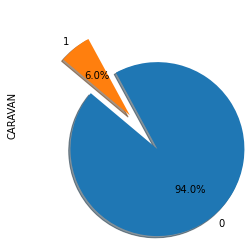

In [6]:
df.CARAVAN.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140,explode=(0.5, 0))

It's a dataset with 9822 observations.
The dataset is without null values and outliers
The dataset is imbalanced as Yes answer represent only 6%

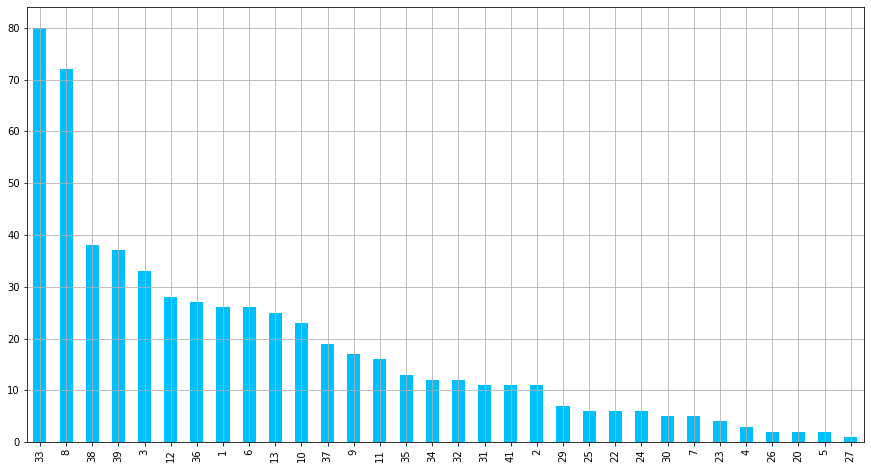

In [7]:
# Customer Sub Type

yes = df[df.CARAVAN == 1].copy()
plt.figure(figsize=(15,8))
yes['CustomerSubtype'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True);

<AxesSubplot:>

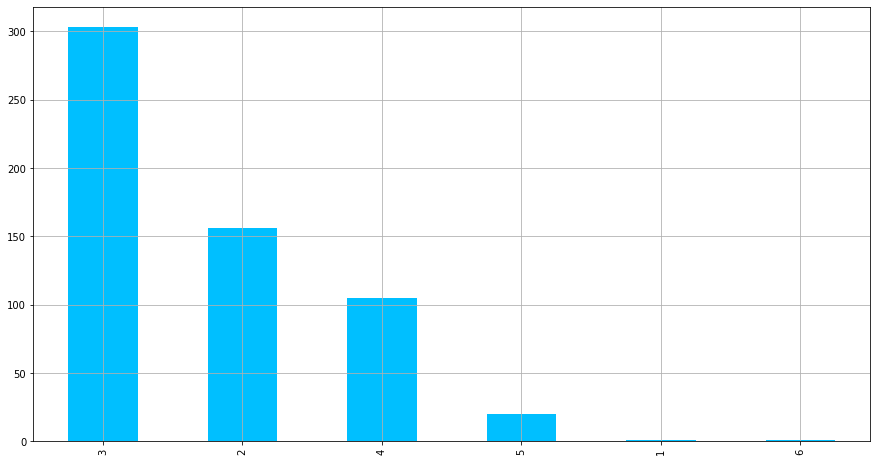

In [8]:
# Number of houses Vs Age

plt.figure(figsize=(15,8))
yes['AvgAge'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True)

<AxesSubplot:>

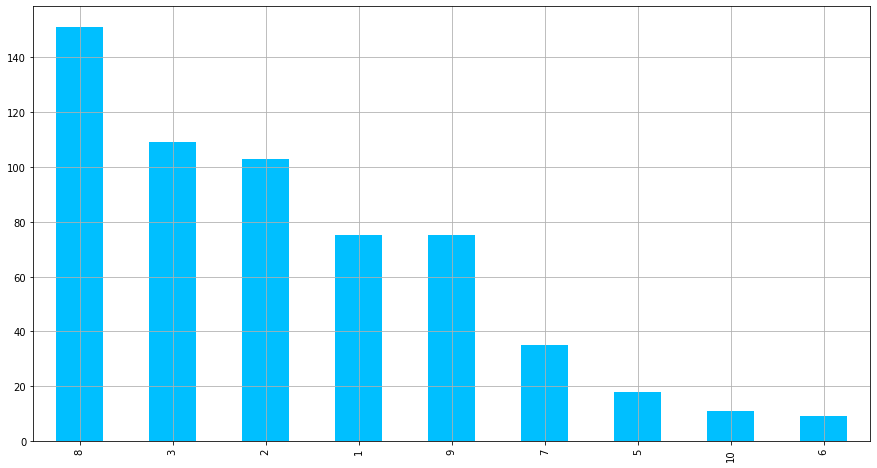

In [9]:
# Customer main type

plt.figure(figsize=(15,8))
yes['CustomerMainType'].value_counts().plot(kind='bar', align='center',color='deepskyblue', grid=True)

### Model training

In [10]:
train = df[df.ORIGIN == 'train'].copy()
test = df[df.ORIGIN == 'test'].copy()

In [11]:
y_train = train.CARAVAN
X_train = train.drop(['CARAVAN','ORIGIN'], axis=1)

In [12]:
y_test = test.CARAVAN
X_test = test.drop(['CARAVAN','ORIGIN'], axis=1)

In [13]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score


classifiers = [
    LogisticRegression(max_iter = 1000,random_state = 48),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),]

# Logging for Visual Comparison
log_cols=["Classifier", "F-score", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = clf.predict(X_test)
    acc = f1_score(y_test, test_predictions)
    print("F-score: {:.4%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
F-score: 2.4390%
Log Loss: 0.20703112318091288
KNeighborsClassifier
****Results****
F-score: 9.7720%
Log Loss: 1.5387980427763202
AdaBoostClassifier
****Results****
F-score: 3.1621%
Log Loss: 0.6526388876716189
GradientBoostingClassifier
****Results****
F-score: 4.7059%
Log Loss: 0.20900656935221473


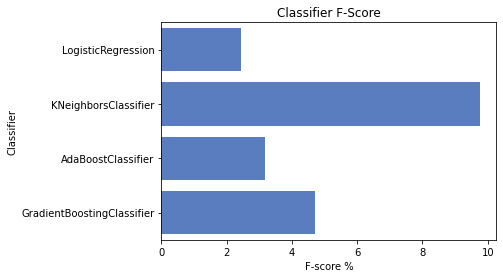

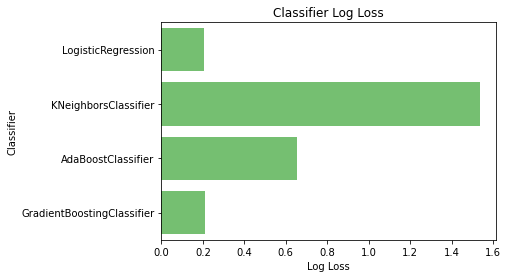

In [14]:
# F-Score & Log Loss Visualization

sns.set_color_codes("muted")
sns.barplot(x='F-score', y='Classifier', data=log, color="b")

plt.xlabel('F-score %')
plt.title('Classifier F-Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [15]:
# Classification Report: Precision, Recall and f1-score // Base Model
from sklearn.metrics import classification_report
clf1 = GradientBoostingClassifier()
clf1.fit(X_train, y_train)
test_predictions1 = clf1.predict(X_test)
report = classification_report(y_test, test_predictions1)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.31      0.02      0.04       238

    accuracy                           0.94      4000
   macro avg       0.63      0.51      0.50      4000
weighted avg       0.90      0.94      0.91      4000



#### Which predictors seem to be the most important? 

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=3)
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
rf.fit(X_train, y_train) 
fi = rf_feat_importance(rf, X_train); fi[:10]

,cols,imp
67,NumberOfCarPolicies,0.154825
46,ContributionCarPolicies,0.111258
58,ContributionFirePolicies,0.085771
81,NumberOfBoatPolicies,0.070181
41,AverageIncome,0.056116
17,LowerLevelEducation,0.054296
42,PurchasingPowerClass,0.053321
43,ContributionPrivateThirdPartyInsurance,0.046064
30,HomeOwners,0.040992
0,CustomerSubtype,0.040573


The most important predictor by a reasonable amount is NumberOfCarPolicies

#### Predict if the person will buy insurace or not.

In [17]:
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target=test_target.replace({
    1:'Yes',
    0:'No'
})
predicted_target=rf.predict(X_test)
predicted_target=pd.Series(predicted_target).replace({
    1:'Yes',
    0:'No'
})

In [19]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier()
brf.fit(X_train,y_train)
brf_pred_prob = brf.predict_proba(X_test)[:, 1]
ranks=pd.DataFrame(data={
    'realClass':test_target,
    'predictedClass':predicted_target,
    'rank':brf_pred_prob
})
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,realClass,predictedClass,rank
2118,Yes,No,0.99
706,No,No,0.99
3092,Yes,No,0.97
944,No,No,0.96
2154,No,No,0.96


#### Com-pare your results with logistic regression and KNN

Comparing all the models performed earlier Gradient Boosting Classifier outperform all the other models by 94% f1-score.